# PRCP-1018-BikeRental

### Problem Statement

Task 1:- Prepare a complete data analysis report on the given data.

Task 2:- Prediction of daily bike rental count based on the environmental and seasonal settings.


### Summary of the project

Bike sharing systems are an automated evolution of traditional bike rentals, allowing users to rent and return bikes at different locations with ease. With over 500 programs and 500,000 bicycles worldwide, these systems are gaining attention for their positive impact on traffic, environmental, and health issues. The detailed data generated by bike sharing systems, including travel duration and locations, make them valuable for research, turning them into a virtual sensor network for monitoring urban mobility and detecting important city events. The goal is to leverage this data to enhance urban planning, improve transportation efficiency, and address environmental challenges.








**Importing Required libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings ('ignore')

In [2]:
data=pd.read_csv('hour.csv')

In [3]:
data

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2011,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,01-01-2011,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,01-01-2011,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,01-01-2011,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,01-01-2011,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,31-12-2012,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,31-12-2012,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,31-12-2012,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,31-12-2012,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [4]:
data.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [6]:
data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
# Unique values
data.apply(lambda x: len(x.unique()))

instant       17379
dteday          731
season            4
yr                2
mnth             12
hr               24
holiday           2
weekday           7
workingday        2
weathersit        4
temp             50
atemp            65
hum              89
windspeed        30
casual          322
registered      776
cnt             869
dtype: int64

In [8]:
#renamimg the data for better understanding
data = data.rename(columns={'weathersit':'weather',
                       'yr':'year',
                       'mnth':'month',
                       'hr':'hour',
                       'hum':'humidity',
                       'cnt':'total_count'})
data.head()

,instant,dteday,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total_count
0,1,01-01-2011,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,01-01-2011,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,01-01-2011,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,01-01-2011,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,01-01-2011,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [9]:
data= data.drop(columns=['instant', 'dteday', 'year'])

In [10]:
data.head()

,season,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total_count
0,1,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,1,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,1,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,1,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,1,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [11]:
# change int columns to category
cols = ['season','month','hour','holiday','weekday','workingday','weather']

for col in cols:
    data[col] = data[col].astype('category')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   season       17379 non-null  category
 1   month        17379 non-null  category
 2   hour         17379 non-null  category
 3   holiday      17379 non-null  category
 4   weekday      17379 non-null  category
 5   workingday   17379 non-null  category
 6   weather      17379 non-null  category
 7   temp         17379 non-null  float64 
 8   atemp        17379 non-null  float64 
 9   humidity     17379 non-null  float64 
 10  windspeed    17379 non-null  float64 
 11  casual       17379 non-null  int64   
 12  registered   17379 non-null  int64   
 13  total_count  17379 non-null  int64   
dtypes: category(7), float64(4), int64(3)
memory usage: 1.0 MB


## EDA [Exploratory Data analysis]

### Univariate Analysis

In [12]:
import sweetviz as sv
my_report=sv.analyze(data)
my_report.show_html()

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


## Insights on Univariate analysis

**Season**
 - Summer has the highest preferance for bike rentals which indicates that the weather conditions could be best for biking.
 - Spring rentals are relatively close to Summer rentals.
 - Winter and fall are not too low but dont account to majority.
 
**Month**
 - Months of May,June and December account for the highest rentals in the year
 - The rest of the months have about the same number of rentals
 
**Hour**
 - These insights suggest that bike rentals are most frequent during late afternoon hours, likely aligning with typical end-of-day activities.

**Holiday**
 - There is a majority of about 97% retals take place during holidays.
 
**Weekday**
 - The insights suggest that there is no difference in the number of rental bikes irrespective of the day.
 
**Weather**
 - Clear/partly cloudy weather is the best for bike rentals or for commuting.
 
**Temperature**
 - The temperature is most frequent around 0.6-0.7 which suggests an ideal temperature for rening a bike.
 
**Registered Bikes**
 - The most common value is 4, occurring 3.07% of the time. Followed by 5,6,3 & 7.

**Count**

### Bivariate Analysis

In [13]:
data.columns

Index(['season', 'month', 'hour', 'holiday', 'weekday', 'workingday',
       'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'casual',
       'registered', 'total_count'],
      dtype='object')

In [14]:
num_col=data.drop(['season','month','hour', 'holiday', 'weekday', 'workingday','weather'],axis=1)
num_col

,temp,atemp,humidity,windspeed,casual,registered,total_count
0,0.24,0.2879,0.81,0.0000,3,13,16
1,0.22,0.2727,0.80,0.0000,8,32,40
2,0.22,0.2727,0.80,0.0000,5,27,32
3,0.24,0.2879,0.75,0.0000,3,10,13
4,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...
17374,0.26,0.2576,0.60,0.1642,11,108,119
17375,0.26,0.2576,0.60,0.1642,8,81,89
17376,0.26,0.2576,0.60,0.1642,7,83,90
17377,0.26,0.2727,0.56,0.1343,13,48,61


In [15]:
cat_col=data.drop(['temp','atemp','humidity','windspeed','casual','registered','total_count'],axis=1)
cat_col

,season,month,hour,holiday,weekday,workingday,weather
0,1,1,0,0,6,0,1
1,1,1,1,0,6,0,1
2,1,1,2,0,6,0,1
3,1,1,3,0,6,0,1
4,1,1,4,0,6,0,1
...,...,...,...,...,...,...,...
17374,1,12,19,0,1,1,2
17375,1,12,20,0,1,1,2
17376,1,12,21,0,1,1,1
17377,1,12,22,0,1,1,1


**For Numerical Columns**

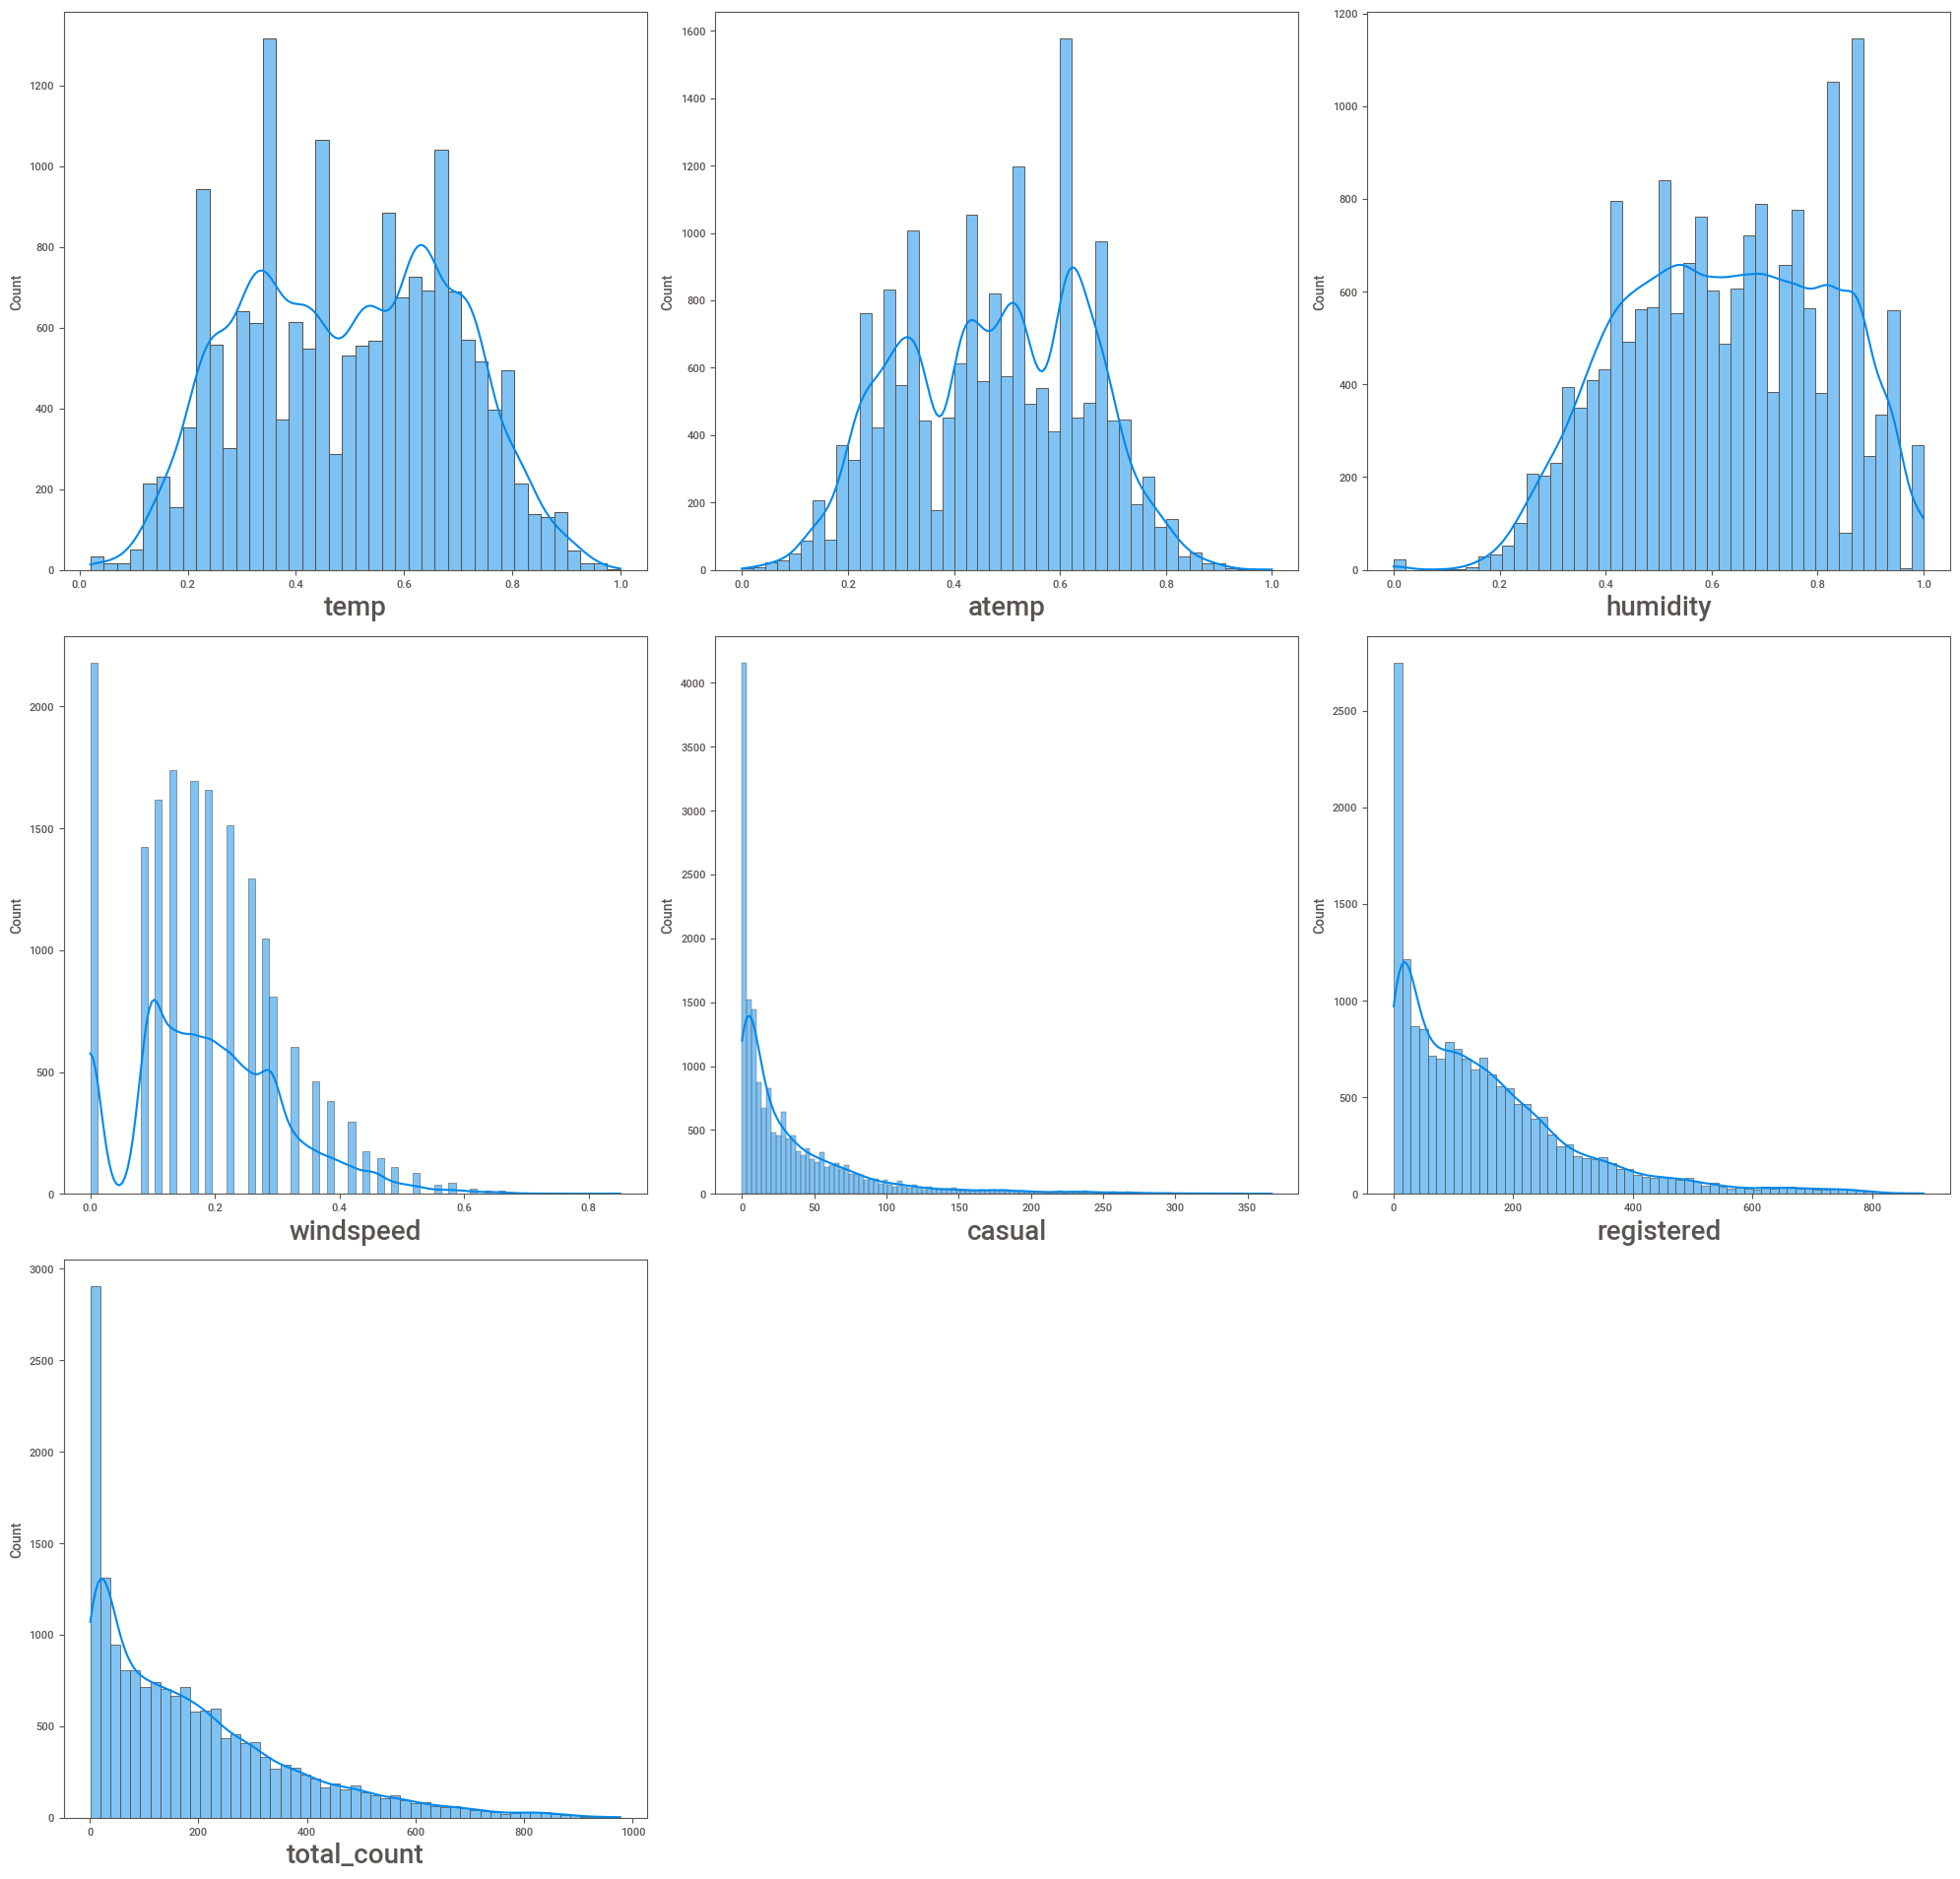

In [16]:
plt.figure(figsize=(20,25), facecolor='white')#To set canvas
plotnumber = 1#counter

for column in num_col:#accessing the numerical columns
    if plotnumber<=8 :
        ax = plt.subplot(4,3,plotnumber)
        sns.histplot(x=data[column],kde=True)
        plt.xlabel(column,fontsize=20)#assign name to x-axis and set font-20
    plotnumber+=1#counter increment
plt.tight_layout()

**For Categorcal columns**

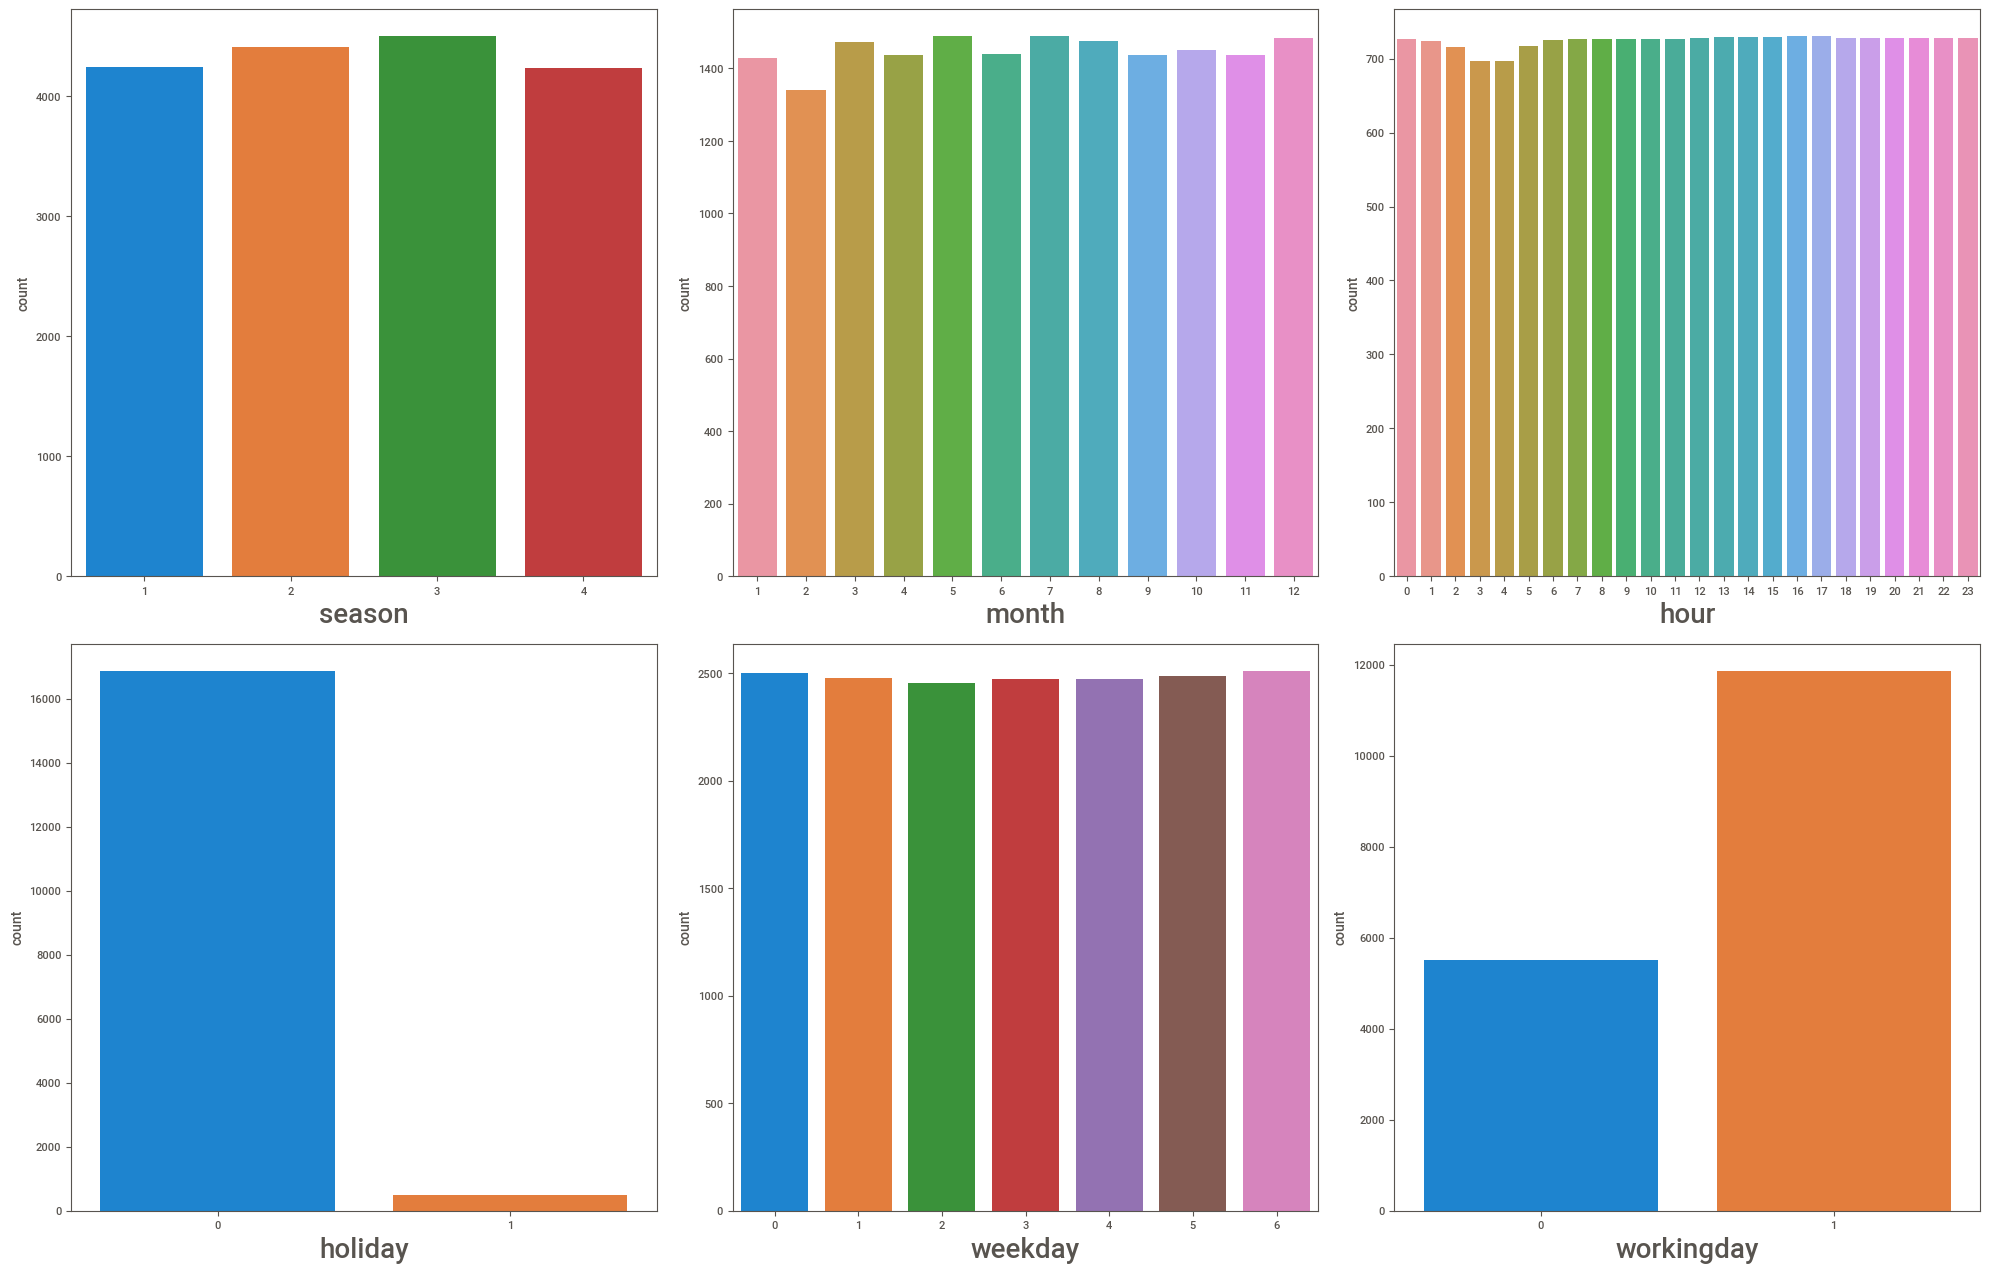

In [17]:
plt.figure(figsize=(20,25), facecolor='white')#To set canvas
plotnumber = 1#counter

for column in cat_col:#accessing the categorical columns
    if plotnumber<=6 :
        ax = plt.subplot(4,3,plotnumber)
        sns.countplot(x=data[column])
        plt.xlabel(column,fontsize=20)#assign name to x-axis and set font-20
    plotnumber+=1#counter increment
plt.tight_layout()
plt.show()

### Insights on Bivariate Analysis

**Weather Conditions:**

The majority of the data falls under a specific weather condition (likely clear weather), with very few instances of severe weather. This suggests that bike rentals are mostly recorded in favorable weather conditions.

**Temperature (temp and atemp):**

The temperature distributions (temp and atemp, likely representing actual temperature and "feels-like" temperature) are somewhat bimodal. This indicates that bike rentals occur across a range of temperatures, but with peaks around moderate temperatures.

**Humidity:**

Humidity shows a right-skewed distribution, with most bike rentals occurring when humidity is below 60%. There is still a significant number of rentals at higher humidity levels.

**Windspeed:**

The windspeed distribution is highly right-skewed, with most bike rentals happening at lower wind speeds. As windspeed increases, the number of rentals decreases, indicating that high winds may discourage bike use.

**Casual Users:**

The casual user count distribution is heavily right-skewed, with a majority of instances showing a low count of casual users. This could indicate that casual bike rentals are much less frequent than those by registered users.

**Registered Users:**

The registered user count also shows a right-skewed distribution but with a broader spread compared to casual users, suggesting that registered users contribute more consistently to bike rentals.

**Total Count (total_count):**

The total count of bike rentals combines both casual and registered users and follows a similar distribution to the registered category, indicating that registered users make up a significant portion of total bike rentals.

### Multivariate Analysis

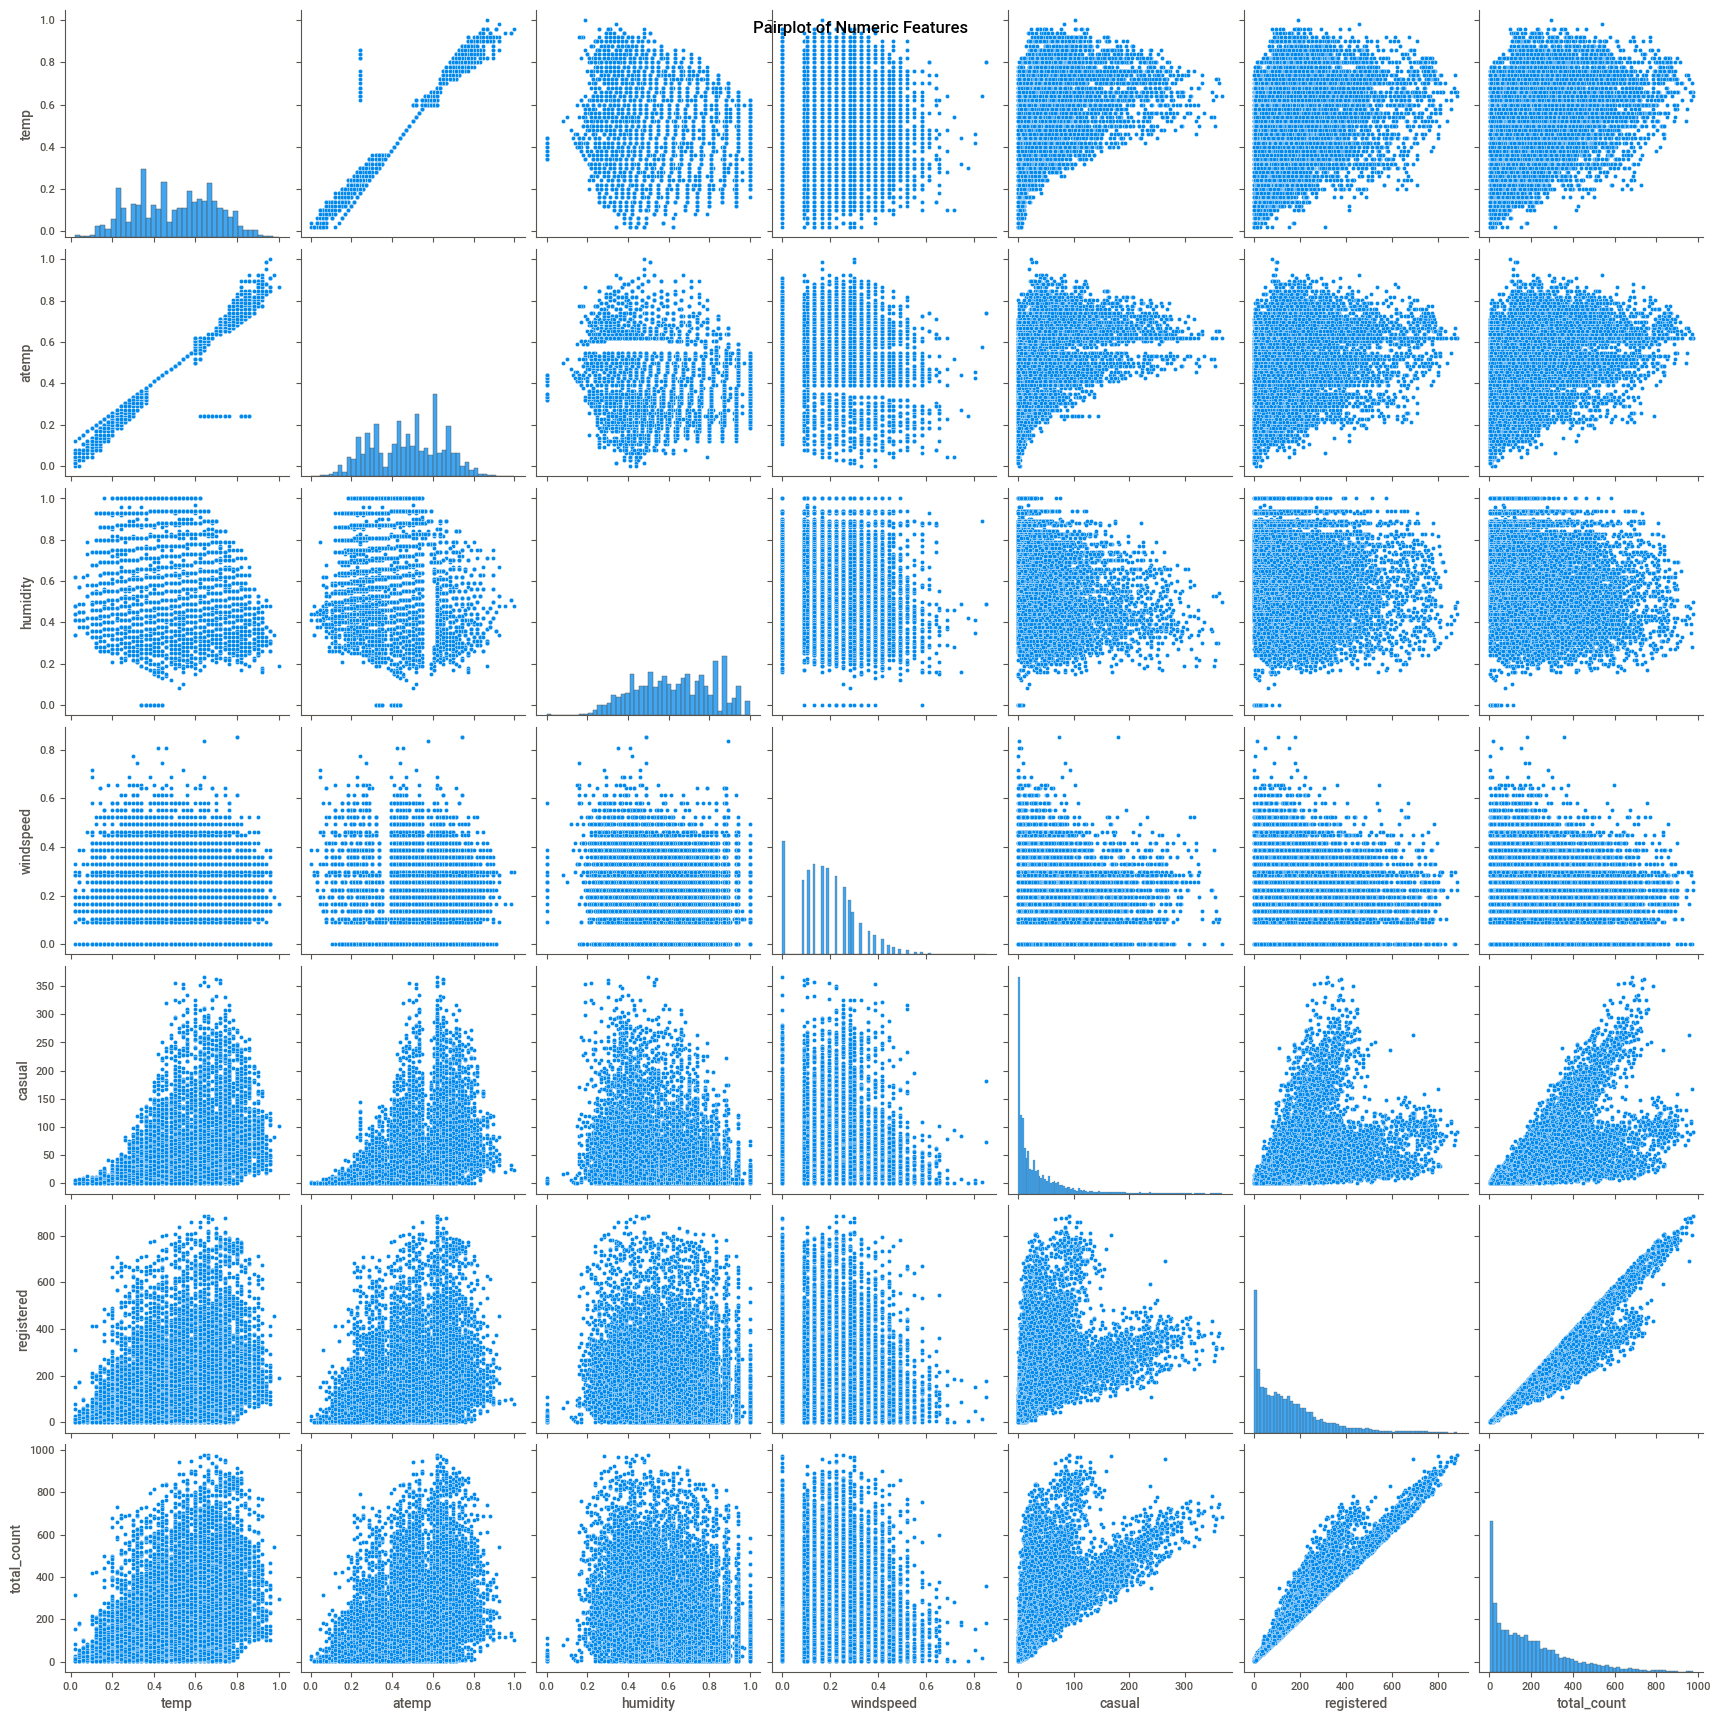

In [18]:
# Pairplot for numeric features
sns.pairplot(data, vars=num_col)
plt.suptitle('Pairplot of Numeric Features')
plt.show()


####  Insights on MultiVariate Analysis

Temperature (temp and atemp) Correlation:

temp and atemp (feels-like temperature) are highly correlated, as expected. The scatter plot between these two variables shows a nearly perfect linear relationship, indicating that they are very similar measurements.

Correlation with total_count:

Both temp and atemp show a positive correlation with total_count, meaning higher temperatures generally lead to an increase in bike rentals.
humidity shows a slight negative correlation with total_count, suggesting that higher humidity might slightly reduce bike rentals.
windspeed shows a weak negative correlation with total_count, which aligns with the idea that higher wind speeds can discourage biking.

Casual vs. Registered Users:

The relationship between registered users and total_count is nearly linear, indicating that registered users are a major contributor to the total bike rentals.
The relationship between casual users and total_count is more spread out, indicating that casual user rentals are less consistent.

Distribution Observations:

The weather variable is mostly categorical, and the plots show that bike rentals are clustered within specific weather conditions.
The windspeed variable has a concentrated distribution with many zero values, possibly indicating many days with very low or negligible windspeed, leading to a more vertical distribution in the plots.

Relationships between Environmental Factors:

There is no strong correlation observed between humidity and temp, but there is some level of interaction where higher temperatures might slightly coincide with lower humidity, as seen in the slightly negative slope in their scatter plot.

<Axes: >

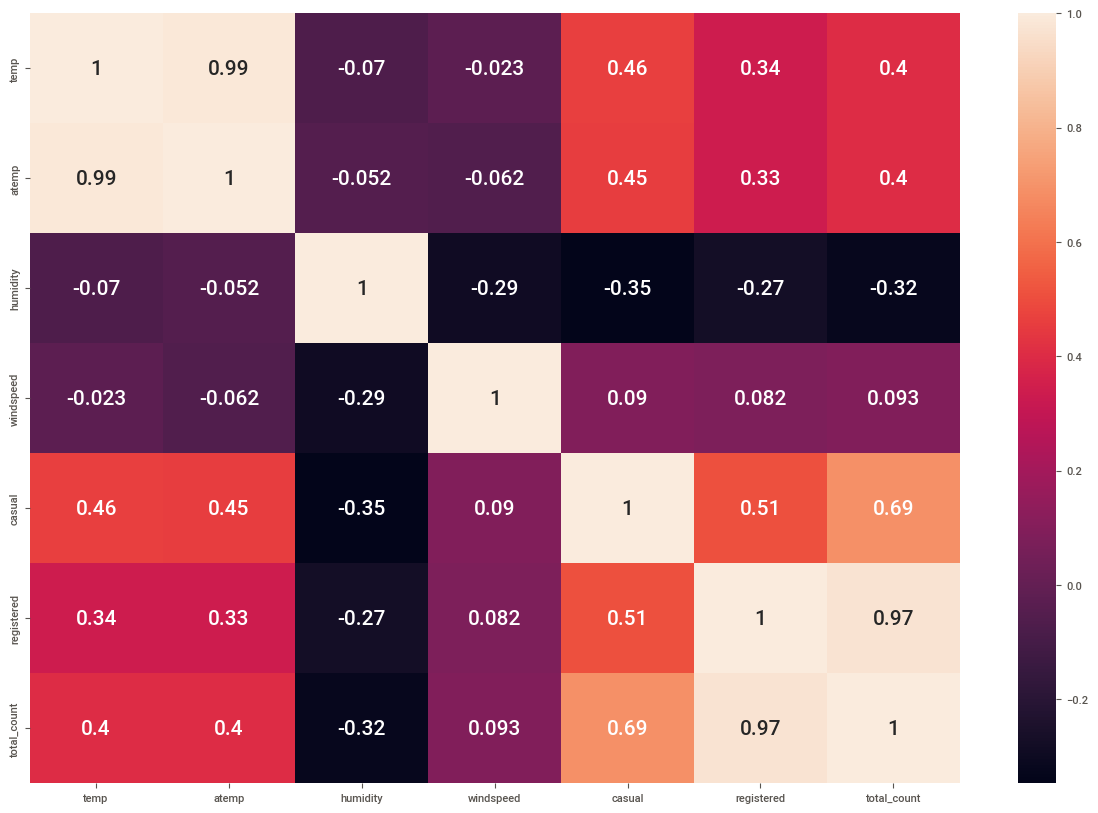

In [19]:
corr = num_col.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True, annot_kws={'size':15})

## Data preprocessing

In [20]:
for i in cat_col:
    print(cat_col[i].value_counts())
    print(cat_col[i].unique())
    print("******************************")

season
3    4496
2    4409
1    4242
4    4232
Name: count, dtype: int64
[1, 2, 3, 4]
Categories (4, int64): [1, 2, 3, 4]
******************************
month
5     1488
7     1488
12    1483
8     1475
3     1473
10    1451
6     1440
4     1437
9     1437
11    1437
1     1429
2     1341
Name: count, dtype: int64
[1, 2, 3, 4, 5, ..., 8, 9, 10, 11, 12]
Length: 12
Categories (12, int64): [1, 2, 3, 4, ..., 9, 10, 11, 12]
******************************
hour
17    730
16    730
13    729
15    729
14    729
12    728
22    728
21    728
20    728
19    728
18    728
23    728
11    727
10    727
9     727
8     727
7     727
0     726
6     725
1     724
5     717
2     715
4     697
3     697
Name: count, dtype: int64
[0, 1, 2, 3, 4, ..., 19, 20, 21, 22, 23]
Length: 24
Categories (24, int64): [0, 1, 2, 3, ..., 20, 21, 22, 23]
******************************
holiday
0    16879
1      500
Name: count, dtype: int64
[0, 1]
Categories (2, int64): [0, 1]
******************************
weekday
6

## Handeling Outliers

In [21]:
num_col

,temp,atemp,humidity,windspeed,casual,registered,total_count
0,0.24,0.2879,0.81,0.0000,3,13,16
1,0.22,0.2727,0.80,0.0000,8,32,40
2,0.22,0.2727,0.80,0.0000,5,27,32
3,0.24,0.2879,0.75,0.0000,3,10,13
4,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...
17374,0.26,0.2576,0.60,0.1642,11,108,119
17375,0.26,0.2576,0.60,0.1642,8,81,89
17376,0.26,0.2576,0.60,0.1642,7,83,90
17377,0.26,0.2727,0.56,0.1343,13,48,61


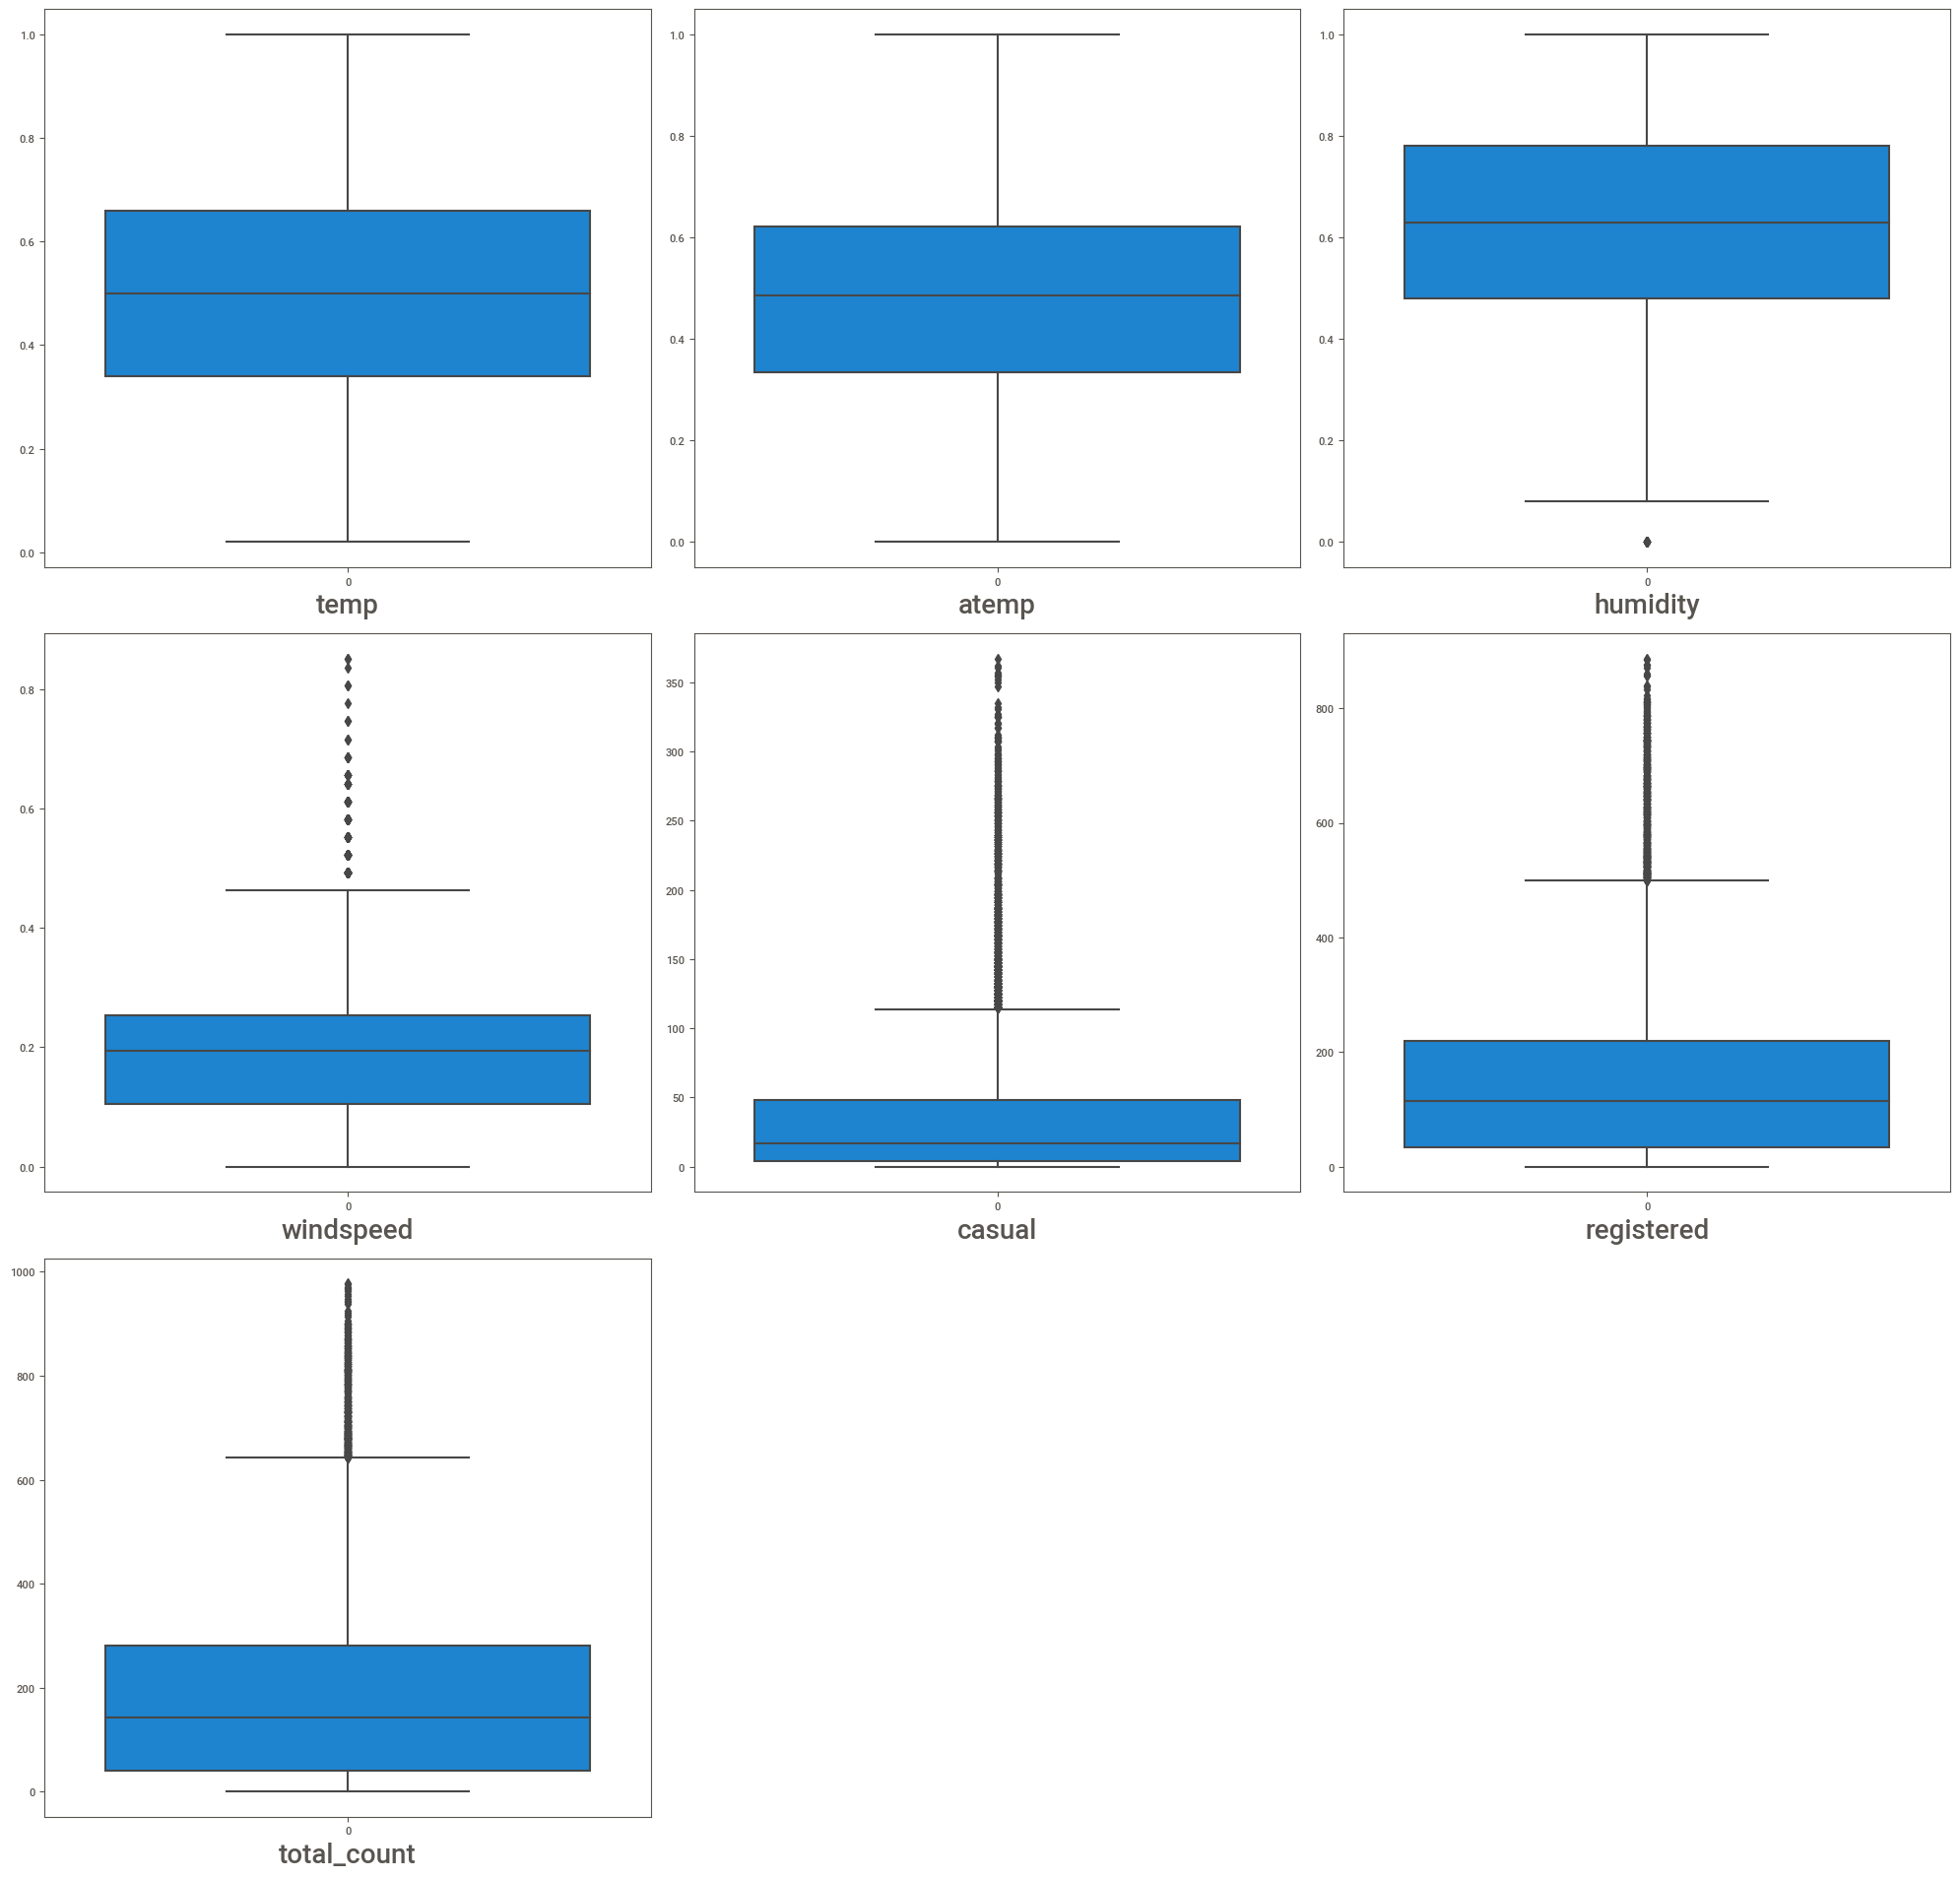

In [22]:
plt.figure(figsize=(20,25), facecolor='white')#To set canvas
plotnumber = 1#counter

for column in num_col:#accessing the categorical columns
    if plotnumber<=11 :
        ax = plt.subplot(4,3,plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column,fontsize=20)#assign name to x-axis and set font-20
    plotnumber+=1#counter increment
plt.tight_layout()
plt.show()

**1] Humidity**

<Axes: xlabel='humidity', ylabel='Count'>

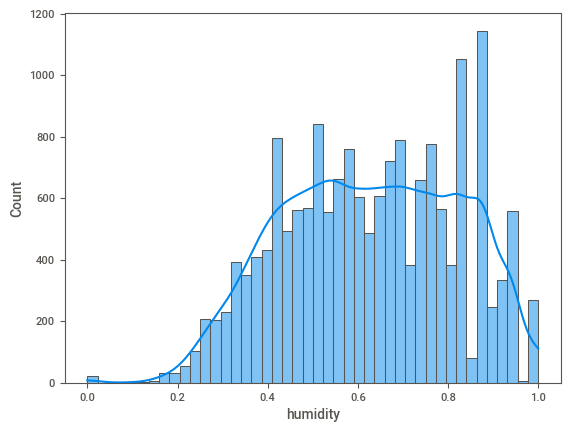

In [23]:
sns.histplot(x=data["humidity"],kde=True)

In [24]:
Q1=data.humidity.quantile(0.25)
Q3=data.humidity.quantile(0.75)

IQR=Q3-Q1

In [25]:
upper_limit=Q3+IQR*1.5
lower_limit=Q1-IQR*1.5

In [26]:
data.humidity.loc[data["humidity"] > upper_limit]

Series([], Name: humidity, dtype: float64)

In [27]:
data.humidity.loc[data["humidity"] < lower_limit]

1551    0.0
1552    0.0
1553    0.0
1554    0.0
1555    0.0
1556    0.0
1557    0.0
1558    0.0
1559    0.0
1560    0.0
1561    0.0
1562    0.0
1563    0.0
1564    0.0
1565    0.0
1566    0.0
1567    0.0
1568    0.0
1569    0.0
1570    0.0
1571    0.0
1572    0.0
Name: humidity, dtype: float64

In [28]:
(len(data.humidity.loc[data["humidity"] < lower_limit])/len(data))*100

0.1265895621151965

In [29]:
data.loc[data["humidity"] < lower_limit, "humidity"] = np.median(data.humidity)

<Axes: >

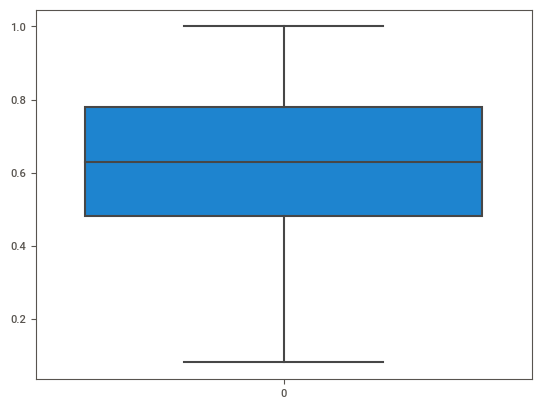

In [30]:
sns.boxplot(data["humidity"])

**2] Windspeed**

In [31]:
Q1=data.windspeed.quantile(0.25)
Q3=data.windspeed.quantile(0.75)

IQR=Q3-Q1

In [32]:
upper_limit=Q3+IQR*1.5
lower_limit=Q1-IQR*1.5

In [33]:
data.windspeed.loc[data["windspeed"] > upper_limit]

175      0.4925
178      0.5522
194      0.5224
196      0.5224
265      0.5821
          ...  
17327    0.5522
17328    0.4925
17341    0.5821
17343    0.5821
17344    0.6567
Name: windspeed, Length: 342, dtype: float64

In [34]:
(len(data.windspeed.loc[data["windspeed"] > upper_limit])/len(data))*100

1.9678922837907822

In [35]:
(len(data.windspeed.loc[data["windspeed"] < lower_limit])/len(data))*100

0.0

In [36]:
data.loc[data["windspeed"] > upper_limit, "windspeed"] = np.median(data.windspeed)

<Axes: >

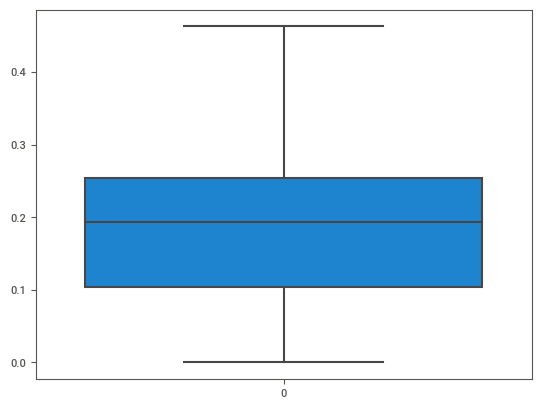

In [37]:
sns.boxplot(data["windspeed"])

**3] Casual**

In [38]:
data['casual'] = np.log(data['casual']+ 1e-10)

<Axes: >

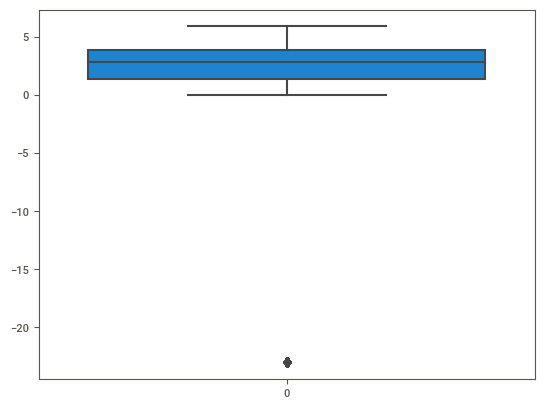

In [39]:
sns.boxplot(data['casual'])

<Axes: xlabel='casual', ylabel='Count'>

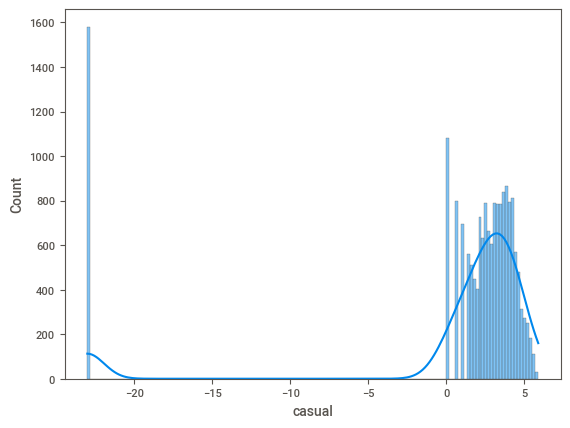

In [40]:
sns.histplot(x=data["casual"],kde=True)

In [41]:
Q1=data.casual.quantile(0.25)
Q3=data.casual.quantile(0.75)

IQR=Q3-Q1

In [42]:
upper_limit=Q3+IQR*1.5
lower_limit=Q1-IQR*1.5

In [43]:
data.casual.loc[data["casual"] > upper_limit]

Series([], Name: casual, dtype: float64)

In [44]:
data.casual.loc[data["casual"] < lower_limit]

4       -23.025851
5       -23.025851
29      -23.025851
30      -23.025851
31      -23.025851
           ...    
17338   -23.025851
17358   -23.025851
17359   -23.025851
17360   -23.025851
17361   -23.025851
Name: casual, Length: 1581, dtype: float64

In [45]:
data.loc[data["casual"] < lower_limit, "casual"] = np.median(data.casual)

<Axes: >

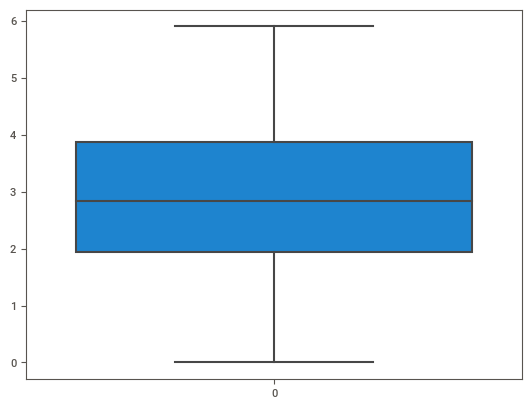

In [46]:
sns.boxplot(data['casual'])

**4] Registered**

<Axes: xlabel='registered', ylabel='Count'>

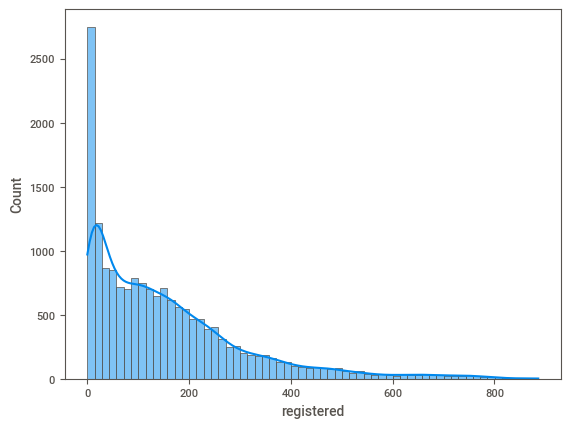

In [47]:
sns.histplot(data["registered"] , kde=True)

In [48]:
data['registered'] = np.log(data['registered']+ 1e-10)

<Axes: xlabel='registered', ylabel='Count'>

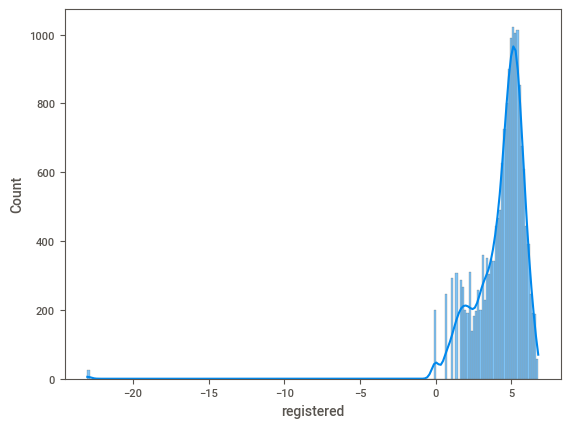

In [49]:
sns.histplot(data["registered"] , kde=True)

In [50]:
Q1=data.registered.quantile(0.25)
Q3=data.registered.quantile(0.75)

IQR=Q3-Q1

In [51]:
upper_limit=Q3+IQR*1.5
lower_limit=Q1-IQR*1.5

In [52]:
data.registered.loc[data["registered"] > upper_limit]

Series([], Name: registered, dtype: float64)

In [53]:
data.registered.loc[data["registered"] < lower_limit]

4        1.000000e-10
5        1.000000e-10
6       -2.302585e+01
7        6.931472e-01
28       1.000000e-10
             ...     
17261    6.931472e-01
17262    1.000000e-10
17286    6.931472e-01
17336    6.931472e-01
17358    1.000000e-10
Name: registered, Length: 470, dtype: float64

In [54]:
data.loc[data["registered"] < lower_limit, "registered"] = np.median(data.registered)

<Axes: >

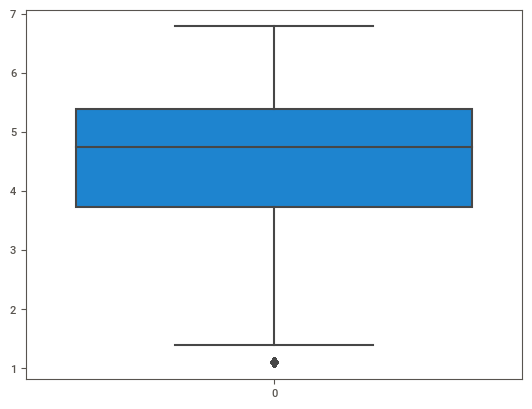

In [55]:
sns.boxplot(data['registered'])

In [56]:
data.registered.loc[data["registered"] < lower_limit]

Series([], Name: registered, dtype: float64)

<Axes: xlabel='registered', ylabel='Count'>

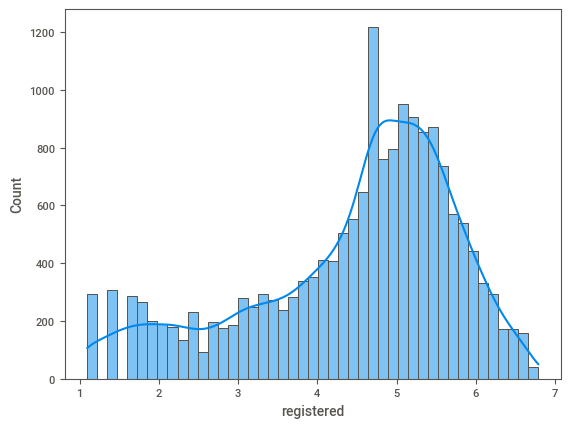

In [57]:
sns.histplot(data["registered"] , kde=True)

**5] Total Count**

In [58]:
data['total_count'] = np.log(data['total_count'])

<Axes: xlabel='total_count', ylabel='Count'>

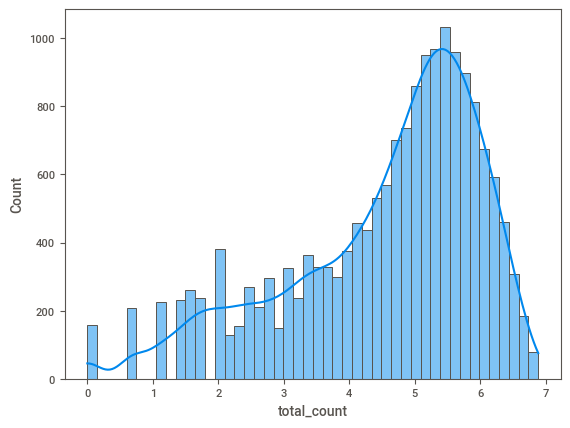

In [59]:
sns.histplot(data["total_count"] , kde=True)

In [60]:
Q1=data.total_count.quantile(0.25)
Q3=data.total_count.quantile(0.75)

IQR=Q3-Q1

In [61]:
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR
print(upper_limit,lower_limit)

8.56256749216346 0.7646666312842227


In [62]:
data.total_count.loc[data["total_count"] > upper_limit]

Series([], Name: total_count, dtype: float64)

In [63]:
data.total_count.loc[data["total_count"] < lower_limit]

4        0.000000
5        0.000000
6        0.693147
29       0.693147
30       0.000000
           ...   
17261    0.693147
17262    0.000000
17286    0.693147
17336    0.693147
17358    0.000000
Name: total_count, Length: 366, dtype: float64

In [64]:
data.loc[data["total_count"] < lower_limit, "total_count"] = np.median(data.total_count)

<Axes: >

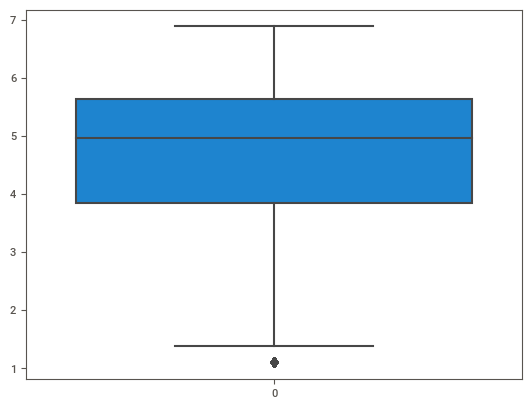

In [65]:
sns.boxplot(data['total_count'])

<Axes: xlabel='total_count', ylabel='Count'>

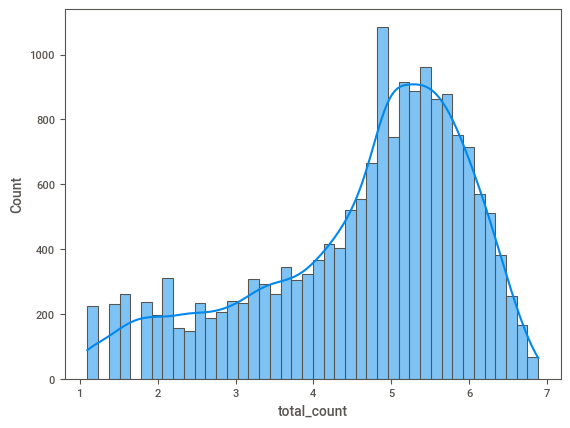

In [66]:
sns.histplot(data["total_count"] , kde=True)

In [67]:
data.total_count.loc[data["total_count"] < lower_limit]

Series([], Name: total_count, dtype: float64)

In [68]:
data.head()

,season,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total_count
0,1,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,1.098612,2.564949,2.772589
1,1,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,2.079442,3.465736,3.688879
2,1,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,1.609438,3.295837,3.465736
3,1,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,1.098612,2.302585,2.564949
4,1,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,2.833213,4.744932,4.955827


## Scaling the data

In [69]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()

In [70]:
df=data.drop(["total_count"],axis=1)
df

,season,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered
0,1,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,1.098612,2.564949
1,1,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,2.079442,3.465736
2,1,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,1.609438,3.295837
3,1,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,1.098612,2.302585
4,1,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,2.833213,4.744932
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,2.397895,4.682131
17375,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,2.079442,4.394449
17376,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,1.945910,4.418841
17377,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,2.564949,3.871201


In [71]:
df=sc.fit_transform(data.drop(["total_count"],axis=1))

In [72]:
df=pd.DataFrame(data=df,columns=[['season','month','hour', 'holiday', 'weekday', 'workingday' ,'weather' ,'temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered']])
df

,season,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered
0,0.0,0.0,0.000000,0.0,1.000000,0.0,0.000000,0.224490,0.2879,0.793478,0.000000,0.186036,0.257790
1,0.0,0.0,0.043478,0.0,1.000000,0.0,0.000000,0.204082,0.2727,0.782609,0.000000,0.352128,0.416153
2,0.0,0.0,0.086957,0.0,1.000000,0.0,0.000000,0.204082,0.2727,0.782609,0.000000,0.272538,0.386284
3,0.0,0.0,0.130435,0.0,1.000000,0.0,0.000000,0.224490,0.2879,0.728261,0.000000,0.186036,0.211665
4,0.0,0.0,0.173913,0.0,1.000000,0.0,0.000000,0.224490,0.2879,0.728261,0.000000,0.479770,0.641043
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,0.0,1.0,0.826087,0.0,0.166667,1.0,0.333333,0.244898,0.2576,0.565217,0.354874,0.406054,0.630002
17375,0.0,1.0,0.869565,0.0,0.166667,1.0,0.333333,0.244898,0.2576,0.565217,0.354874,0.352128,0.579426
17376,0.0,1.0,0.913043,0.0,0.166667,1.0,0.000000,0.244898,0.2576,0.565217,0.354874,0.329516,0.583714
17377,0.0,1.0,0.956522,0.0,0.166667,1.0,0.000000,0.244898,0.2727,0.521739,0.290253,0.434342,0.487436


## Task 2:- Prediction of daily bike rental count based on the environmental and seasonal settings.

## Model Creation

In [73]:
X = df.drop(columns=['atemp', 'windspeed', 'casual', 'registered'], axis=1)
y = data['total_count']

In [74]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=4)

### 1] Linear regression

In [75]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()

model.fit(x_train, y_train)

LinearRegression()

In [76]:
# Train the model on the training data
model.fit(x_train, y_train)

# Make predictions on the test data
y_pred = model.predict(x_test)

In [77]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

LR_mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error (MAE): {LR_mae}')

# Calculate Mean Squared Error (MSE)
LR_mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {LR_mse}')

# Calculate Root Mean Squared Error (RMSE)
LR_rmse = np.sqrt(LR_mse)
print(f'Root Mean Squared Error (RMSE): {LR_rmse}')

# Calculate R-squared (R²)
LR_r2 = r2_score(y_test, y_pred)
print(f'R-squared (R²): {LR_r2}')

# Calculate Adjusted R-squared
n = x_test.shape[0]  # number of observations
p = x_test.shape[1]  # number of predictors
LR_adjusted_r2 = 1 - (1 - LR_r2) * (n - 1) / (n - p - 1)
print(f'Adjusted R-squared: {LR_adjusted_r2}')

Mean Absolute Error (MAE): 0.812601919167747
Mean Squared Error (MSE): 1.0589634265658456
Root Mean Squared Error (RMSE): 1.0290594864077809
R-squared (R²): 0.43202014285774026
Adjusted R-squared: 0.4305452961427142


### 2] Ridge

In [78]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score

# Ridge Regression with a chosen alpha (regularization strength)
ridge = Ridge(alpha=1.0)
ridge.fit(x_train, y_train)

# Predict on the test set
y_pred = ridge.predict(x_test)

# Evaluate R² Score
print(f"R-squared (R²): {r2_score(y_test, y_pred)}")


R-squared (R²): 0.4319845139531282


In [79]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Polynomial Features
poly = PolynomialFeatures(degree=2)  # Change degree based on experimentation
X_poly = poly.fit_transform(X)

# Fit the Linear Regression model
model = LinearRegression()
model.fit(x_train, y_train)

# Predict on the test set
y_pred = model.predict(x_test)

# Evaluate R² Score
print(f"R-squared (R²): {r2_score(y_test, y_pred)}")


R-squared (R²): 0.43202014285774026


In [80]:

# Initialize the Ridge Regression model with a chosen alpha 
ridge = Ridge(alpha=1.0)  # You can tune the alpha parameter

# Fit the model on the training data
ridge.fit(x_train, y_train)

# Predict on the test set
y_pred = ridge.predict(x_test)

# Evaluate the model using various metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)
adjusted_r2 = 1 - (1 - r2) * (len(y_test) - 1) / (len(y_test) - x_test.shape[1] - 1)

# Print the evaluation metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")
print(f"Adjusted R-squared: {adjusted_r2}")


Mean Absolute Error (MAE): 0.812663925141237
Mean Squared Error (MSE): 1.0590298544619028
Root Mean Squared Error (RMSE): 1.0290917619250008
R-squared (R²): 0.4319845139531282
Adjusted R-squared: 0.43050957472219287


#### Hyperparameter Tuning Ridge

In [81]:
from sklearn.model_selection import GridSearchCV, train_test_split

ridge = Ridge()

# Define the hyperparameter grid
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}

# Set up GridSearchCV with cross-validation
grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the grid search to the training data
grid_search.fit(x_train, y_train)

# Get the best model from the grid search
best_ridge = grid_search.best_estimator_

# Predict on the test set using the best model
y_pred = best_ridge.predict(x_test)

# Evaluate the model using various metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
R_r2 = r2_score(y_test, y_pred)
adjusted_r2 = 1 - (1 - r2) * (len(y_test) - 1) / (len(y_test) - x_test.shape[1] - 1)

# Print the evaluation metrics
print(f"Best Alpha: {grid_search.best_params_['alpha']}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {R_r2}")
print(f"Adjusted R-squared: {adjusted_r2}")

Best Alpha: 1
Mean Absolute Error (MAE): 0.812663925141237
Mean Squared Error (MSE): 1.0590298544619028
Root Mean Squared Error (RMSE): 1.0290917619250008
R-squared (R²): 0.4319845139531282
Adjusted R-squared: 0.43050957472219287


### 3] ElasticNetCV with hyperparameters


In [82]:
from sklearn.linear_model import ElasticNetCV

# Define the range of hyperparameters
alphas = np.logspace(-4, 4, 100)  # Logarithmic range of alpha values
l1_ratios = np.linspace(0.1, 1, 10)  # Linear range of l1_ratio values

elastic_net_cv = ElasticNetCV(alphas=alphas, l1_ratio=l1_ratios, cv=5, max_iter=10000, tol=1e-4)
elastic_net_cv.fit(x_train, y_train)


ElasticNetCV(alphas=array([1.00000000e-04, 1.20450354e-04, 1.45082878e-04, 1.74752840e-04,
       2.10490414e-04, 2.53536449e-04, 3.05385551e-04, 3.67837977e-04,
       4.43062146e-04, 5.33669923e-04, 6.42807312e-04, 7.74263683e-04,
       9.32603347e-04, 1.12332403e-03, 1.35304777e-03, 1.62975083e-03,
       1.96304065e-03, 2.36448941e-03, 2.84803587e-03, 3.43046929e-03,
       4.13201240e-03, 4.977023...
       2.91505306e+02, 3.51119173e+02, 4.22924287e+02, 5.09413801e+02,
       6.13590727e+02, 7.39072203e+02, 8.90215085e+02, 1.07226722e+03,
       1.29154967e+03, 1.55567614e+03, 1.87381742e+03, 2.25701972e+03,
       2.71858824e+03, 3.27454916e+03, 3.94420606e+03, 4.75081016e+03,
       5.72236766e+03, 6.89261210e+03, 8.30217568e+03, 1.00000000e+04]),
             cv=5,
             l1_ratio=array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
             max_iter=10000)

In [83]:
y_pred = elastic_net_cv.predict(x_test)

# Calculate the mean squared error of the predictions
mse = mean_squared_error(y_test, y_pred)
E_r2 = r2_score(y_test, y_pred)

# Print out the best alpha and l1_ratio values
print(f'Best alpha: {elastic_net_cv.alpha_}')
print(f'Best l1_ratio: {elastic_net_cv.l1_ratio_}')
print(f'Mean Squared Error: {mse}')
print(f'R² Score: {E_r2}')


# Optionally, get the coefficients
coefficients = elastic_net_cv.coef_
print(f'Coefficients: {coefficients}')

Best alpha: 0.00012045035402587823
Best l1_ratio: 0.8
Mean Squared Error: 1.0590643665127417
R² Score: 0.43196600325746726
Coefficients: [ 0.38443605 -0.07426182  1.94892684 -0.16724632  0.06600931 -0.00893039
  0.0967186   1.70113864 -1.45292358]


### 4] RandomForest Regressor

In [84]:
from sklearn.ensemble import RandomForestRegressor

random_forest_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_regressor.fit(x_train, y_train)
# Make predictions on the test data
y_pred = random_forest_regressor.predict(x_test)

# Calculate the mean squared error and R² score of the predictions
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print out the performance metrics
print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')

# Optionally, get the feature importances
feature_importances = random_forest_regressor.feature_importances_
print(f'Feature Importances: {feature_importances}')

Mean Squared Error: 0.31236266269443336
R² Score: 0.832462863132952
Feature Importances: [0.02141462 0.02866092 0.68070859 0.00330377 0.0275963  0.03941234
 0.02369219 0.1192528  0.05595847]


**Hyperparameter tuning**

In [85]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize the RandomForestRegressor
random_forest_regressor = RandomForestRegressor(random_state=42)

# Initialize RandomizedSearchCV
randomized_search = RandomizedSearchCV(estimator=random_forest_regressor, 
                                       param_distributions=param_dist, 
                                       n_iter=10,  # Number of random combinations to try
                                       cv=5, 
                                       n_jobs=-1, 
                                       verbose=2, 
                                       scoring='r2',
                                       random_state=42)

# Fit RandomizedSearchCV on the training data
randomized_search.fit(x_train, y_train)

# Get the best hyperparameters
best_params = randomized_search.best_params_
print(f"Best hyperparameters: {best_params}")

# Use the best model to make predictions
best_model = randomized_search.best_estimator_
y_pred = best_model.predict(x_test)

# Evaluate the best model
mse = mean_squared_error(y_test, y_pred)
RFR_r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R² Score: {RFR_r2}')

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best hyperparameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': 20, 'bootstrap': True}
Mean Squared Error: 0.29529613264162907
R² Score: 0.8416165742603903


### 5] GradientBoostingRegressor

In [86]:
from sklearn.ensemble import GradientBoostingRegressor

gradient_boosting_regressor = GradientBoostingRegressor(random_state=42)
gradient_boosting_regressor.fit(x_train, y_train)


GradientBoostingRegressor(random_state=42)

In [87]:
# Make predictions on the test data
y_pred = gradient_boosting_regressor.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')

# Optionally, get the feature importances
feature_importances = gradient_boosting_regressor.feature_importances_
print(f'Feature Importances: {feature_importances}')

Mean Squared Error: 0.37621591197911464
R² Score: 0.798214882044129
Feature Importances: [2.19700266e-02 3.52025060e-03 7.91587650e-01 7.89813826e-04
 4.63693165e-03 6.54517071e-02 1.69961411e-02 7.71826776e-02
 1.78648019e-02]


**Hyperparemeter Tuning**

In [88]:
param_dist = {
    'n_estimators': [100, 200, 300],       
    'learning_rate': [0.01, 0.1, 0.2],     
    'max_depth': [3, 4, 5],                
    'min_samples_split': [2, 5, 10],       
    'min_samples_leaf': [1, 2, 4],         
    'subsample': [0.8, 0.9, 1.0]           
}

# Initialize the GradientBoostingRegressor model
gradient_boosting_regressor = GradientBoostingRegressor(random_state=42)

# Initialize RandomizedSearchCV
randomized_search = RandomizedSearchCV(estimator=gradient_boosting_regressor, 
                                       param_distributions=param_dist, 
                                       n_iter=20,  # Number of random combinations to try
                                       cv=5, 
                                       n_jobs=-1, 
                                       verbose=2, 
                                       scoring='r2',
                                       random_state=42)

# Fit RandomizedSearchCV on the training data
randomized_search.fit(x_train, y_train)

# Get the best hyperparameters
best_params = randomized_search.best_params_
print(f"Best hyperparameters: {best_params}")

# Use the best model to make predictions
best_model = randomized_search.best_estimator_
y_pred = best_model.predict(x_test)

# Evaluate the best model
mse = mean_squared_error(y_test, y_pred)
GBR_r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R² Score: {GBR_r2}')

# Optionally, get the feature importances of the best model
feature_importances = best_model.feature_importances_
print(f'Feature Importances: {feature_importances}')

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best hyperparameters: {'subsample': 1.0, 'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': 5, 'learning_rate': 0.1}
Mean Squared Error: 0.2994202827122286
R² Score: 0.8394045675855907
Feature Importances: [0.02442746 0.01207127 0.75861752 0.00175334 0.01234415 0.06216564
 0.01824299 0.08753586 0.02284177]


In [90]:
models = pd.DataFrame({
                'Models': ['Liner Regression','Ridge','ElasticNetCV','RandomForest Regressor','GradientBoosting Regressor'],
                'R2_score':  [LR_r2,R_r2,E_r2,RFR_r2,GBR_r2],
                     })


models.sort_values(by='R2_score', ascending=False)

,Models,R2_score
3,RandomForest Regressor,0.841617
4,GradientBoosting Regressor,0.839405
0,Liner Regression,0.432020
1,Ridge,0.431985
2,ElasticNetCV,0.431966


###  - By comparing various Classification machine learning models,we found that _RandomForest Regressor_ is best suited for Prediction.